In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [69]:
# Make a reference to the modified_data.csv file path
csv_path = "../Data/modified_data.csv"

# Import the data.csv file as a DataFrame
df = pd.read_csv(csv_path)

df.head(15)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,married,Over 23 years old,1,Management (evening attendance),evening,Basic education 3rd cycle (9th/10th/11th year)...,133.1,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,142.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,single,3rd phase - general contingent,4,Tourism,daytime,Secondary education,119.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,single,1st phase - general contingent,3,Social Service,daytime,Secondary education,137.0,Romanian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,single,1st phase - general contingent,1,Social Service,daytime,Secondary education,138.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
scaled_df = df.copy()

In [4]:
scaled_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# List of column names that need to be converted
float_columns = ['Previous qualification (grade)','Admission grade',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 2nd sem (grade)',
                 'Unemployment rate',
                 'Inflation rate',
                 'GDP']

# Convert selected columns from float64 to int64
df[float_columns] = df[float_columns].astype('int64')

In [6]:
# List of column names that need to be converted
float_columns = ['Previous qualification (grade)','Admission grade',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 2nd sem (grade)',
                 'Unemployment rate',
                 'Inflation rate',
                 'GDP']

# Convert selected columns from float64 to int64
scaled_df[float_columns] = scaled_df[float_columns].astype('int64')

In [7]:
scaled_df.dtypes

Marital status                                    object
Application mode                                  object
Application order                                  int64
Course                                            object
Daytime/evening attendance\t                      object
Previous qualification                            object
Previous qualification (grade)                     int64
Nacionality                                       object
Mother's qualification                            object
Father's qualification                            object
Mother's occupation                               object
Father's occupation                               object
Admission grade                                    int64
Displaced                                         object
Educational special needs                         object
Debtor                                            object
Tuition fees up to date                           object
Gender                         

In [10]:
# Filter out rows with 'enrolled' in the 'Target' column
scaled_df = scaled_df[scaled_df['Target'] != 'Enrolled']

In [11]:
scaled_df.head(30)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0,0,10,1,1,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13,0,13,0,0,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0,0,10,1,1,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12,0,9,0,-3,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13,0,13,0,0,Graduate
5,married,Over 23 years old,1,Management (evening attendance),evening,Basic education 3rd cycle (9th/10th/11th year)...,133,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,17,5,11,5,16,0,0,Graduate
6,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,142,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,8,8,8,14,0,15,2,-4,Graduate
7,single,3rd phase - general contingent,4,Tourism,daytime,Secondary education,119,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,5,0,0,0,15,2,-4,Dropout
8,single,1st phase - general contingent,3,Social Service,daytime,Secondary education,137,Romanian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,7,6,14,0,16,0,0,Graduate
9,single,1st phase - general contingent,1,Social Service,daytime,Secondary education,138,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,...,0,6,14,2,13,0,8,1,3,Dropout


In [12]:
# Separate numerical and categorical columns
categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
    'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target'
]

# Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    scaled_df[col] = label_encoder.fit_transform(scaled_df[col])

# # Scale numerical columns using StandardScaler
# scaler = StandardScaler()
# scaled_df[numerical_columns] = scaler.fit_transform(scaled_df[numerical_columns])

In [14]:
scaled_df.head(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,4,3,5,2,0,15,122,13,9,26,...,0,0,0,0,0,0,10,1,1,0
1,4,9,1,15,0,15,160,13,24,20,...,0,6,6,6,13,0,13,0,0,1
2,4,0,5,5,0,15,122,13,10,11,...,0,6,0,0,0,0,10,1,1,0
3,4,3,2,8,0,15,122,13,8,11,...,0,6,10,5,12,0,9,0,-3,1
4,3,14,1,14,1,15,100,13,10,9,...,0,6,6,6,13,0,13,0,0,1
5,3,14,1,10,1,5,133,13,10,11,...,0,5,17,5,11,5,16,0,0,1
6,4,0,1,11,0,15,142,13,9,9,...,0,8,8,8,14,0,15,2,-4,1
7,4,4,4,15,0,15,119,13,10,11,...,0,5,5,0,0,0,15,2,-4,0
8,4,0,3,13,0,15,137,14,24,28,...,0,6,7,6,14,0,16,0,0,1
9,4,0,1,13,0,15,138,13,24,10,...,0,6,14,2,13,0,8,1,3,0


In [15]:
# Define features set
X = scaled_df.copy()
X.drop("Target", axis=1, inplace=True)
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,4,3,5,2,0,15,122,13,9,26,...,0,0,0,0,0,0,0,10,1,1
1,4,9,1,15,0,15,160,13,24,20,...,0,0,6,6,6,13,0,13,0,0
2,4,0,5,5,0,15,122,13,10,11,...,0,0,6,0,0,0,0,10,1,1
3,4,3,2,8,0,15,122,13,8,11,...,0,0,6,10,5,12,0,9,0,-3
4,3,14,1,14,1,15,100,13,10,9,...,0,0,6,6,6,13,0,13,0,0


In [19]:
# Define target vector
y = scaled_df["Target"].ravel()
y[:5]

array([0, 1, 0, 1, 1])

In [20]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [22]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [23]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [24]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [25]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [26]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,315,62
Actual 1,17,514


Accuracy Score : 0.9129955947136564
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       377
           1       0.89      0.97      0.93       531

    accuracy                           0.91       908
   macro avg       0.92      0.90      0.91       908
weighted avg       0.92      0.91      0.91       908



## Feature Importance

In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2229425608733542, 'Curricular units 2nd sem (approved)'),
 (0.15268471612140705, 'Curricular units 1st sem (approved)'),
 (0.08880110296836713, 'Curricular units 2nd sem (grade)'),
 (0.05796835395021258, 'Tuition fees up to date'),
 (0.0516710008689735, 'Curricular units 1st sem (grade)'),
 (0.032106204370078904, 'Age at enrollment'),
 (0.03062768606969639, 'Curricular units 2nd sem (evaluations)'),
 (0.030453821560514283, 'Admission grade'),
 (0.027398675380030886, 'Course'),
 (0.02667381080996372, 'Previous qualification (grade)'),
 (0.026455072030544032, 'Curricular units 1st sem (evaluations)'),
 (0.02286360732584628, 'Curricular units 2nd sem (enrolled)'),
 (0.021578204137492223, 'Curricular units 1st sem (enrolled)'),
 (0.01874606321315709, 'Application mode'),
 (0.017482914993639295, 'Scholarship holder'),
 (0.01746948884919807, "Father's occupation"),
 (0.016487176868139955, "Father's qualification"),
 (0.015269499596584692, 'Unemployment rate'),
 (0.014976193708447298, "Mo

/var/folders/75/2jgwylnd2dq1d2x26b5mbfj00000gn/T/ipykernel_65568/1209418144.py:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('file_path')
/Users/alexvalerio/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


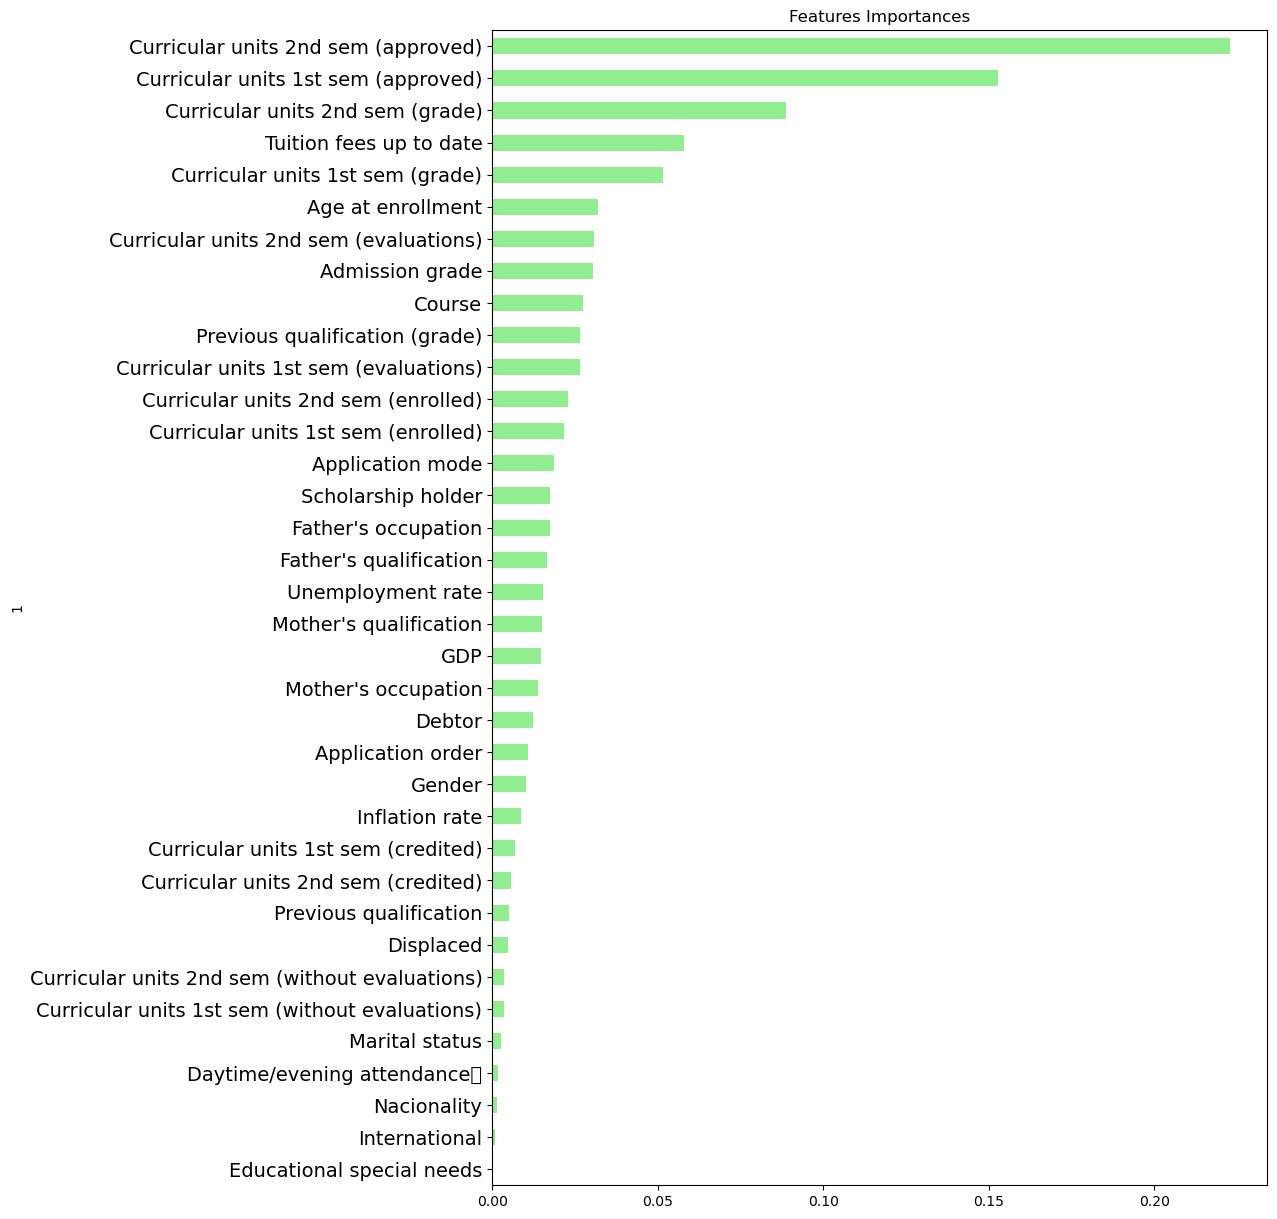

In [68]:
import matplotlib.pyplot as plt

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
ax = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize=(10,15),)
for label in ax.get_yticklabels():
    label.set_size(14)


plt.savefig('file_path')